<a href="https://colab.research.google.com/github/Palak-08/EDA/blob/main/Copy_of_21BDS0163_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module 1

```
Step 1: Loading the Dataset, Exploring Dimensions, Summary, and Data Handling
```



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler


Step 1: Load Dataset and Explore

In [ ]:
url = 'https://raw.githubusercontent.com/salemprakash/EDA/main/Data/bank-full.csv'
df = pd.read_csv(url, sep=';')

1.2 Explore Dimensions and Summary

In [ ]:
print(df.shape)
print(df.info())
print(df.describe(include='all'))


(41188, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   411

1.3 Data Handling: Missing Values

In [ ]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)


<ipython-input-6-cfaaac2f6ccd>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-6-cfaaac2f6ccd>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

Step 2: Data Cleaning and Handling
 2.1 Remove Duplicates

In [ ]:
df.drop_duplicates(inplace=True)


2.2 Outlier Detection and Filtering

In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    z_scores = np.abs(stats.zscore(df[col]))
    df = df[(z_scores < 3)]

Step 3: Univariate Analysis
 3.1 Histogram

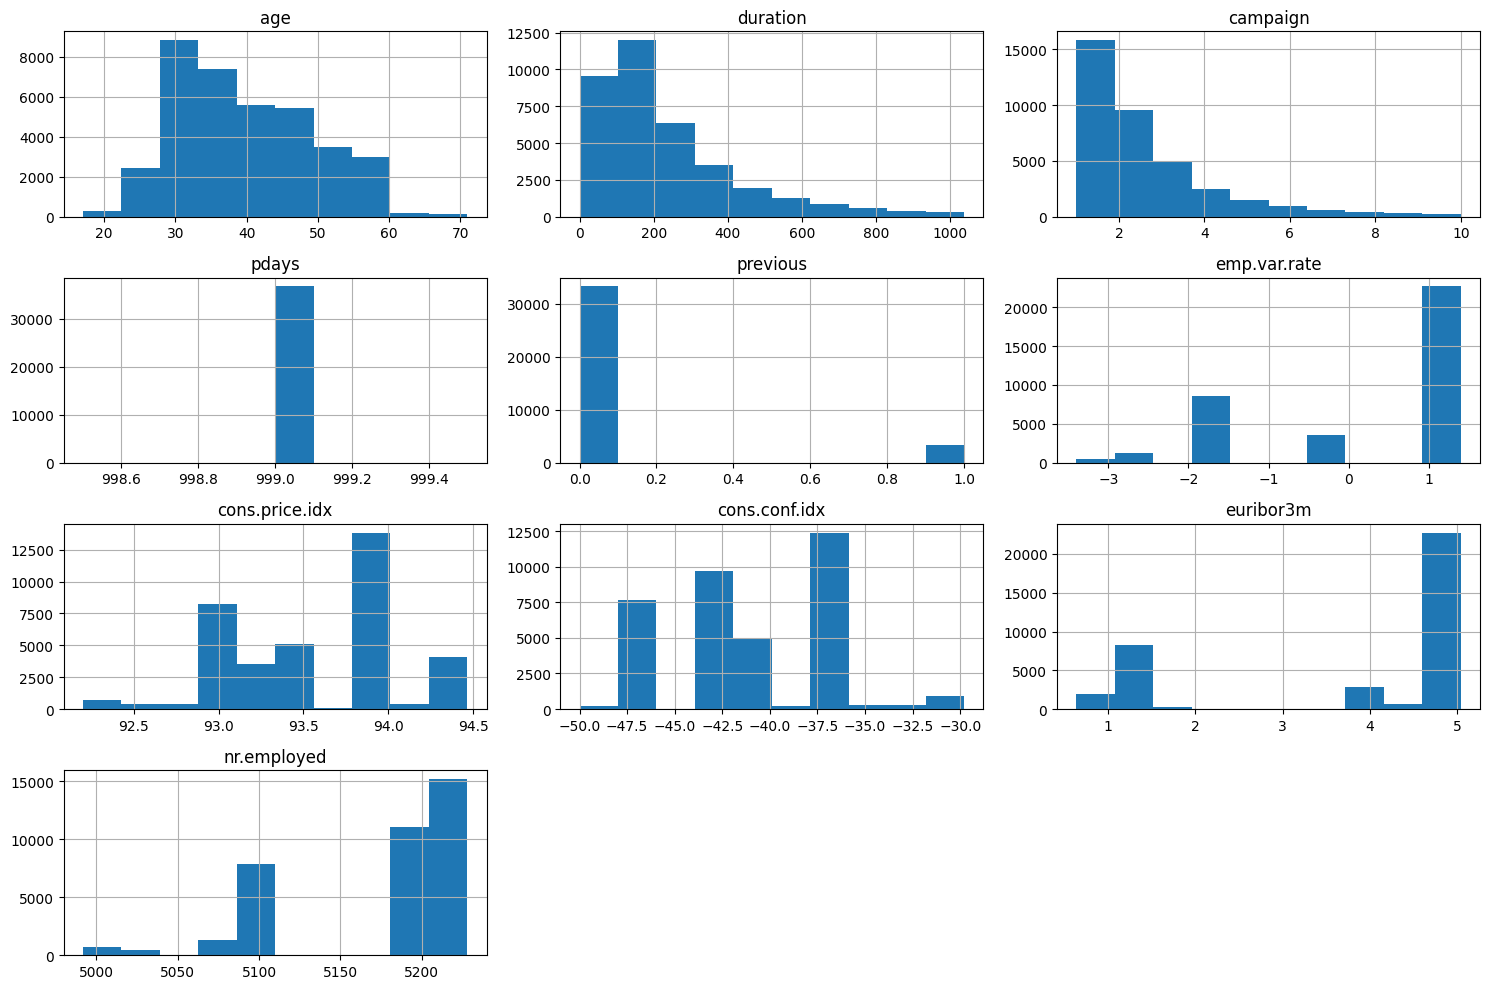

In [ ]:
df[numeric_cols].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

3.2 Density Plot for 'duration'

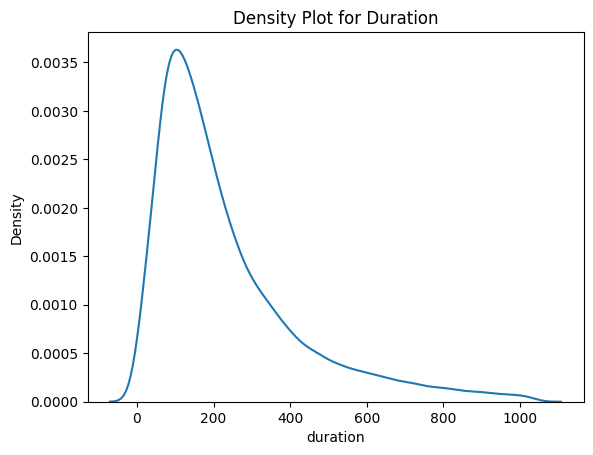

In [ ]:
sns.kdeplot(df['duration'])
plt.title('Density Plot for Duration')
plt.show()

3.3 Box Plot for 'duration'

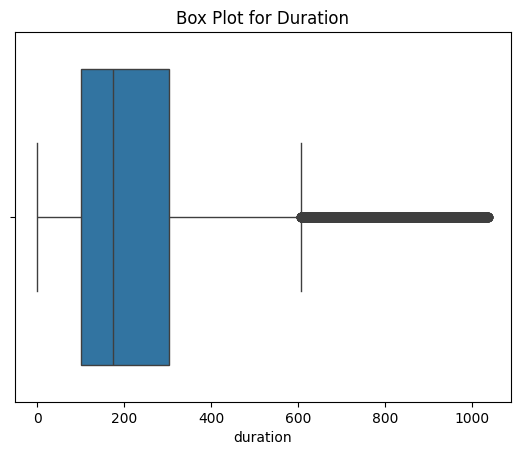

In [ ]:
sns.boxplot(x=df['duration'])
plt.title('Box Plot for Duration')
plt.show()

3.4 Bar Plot

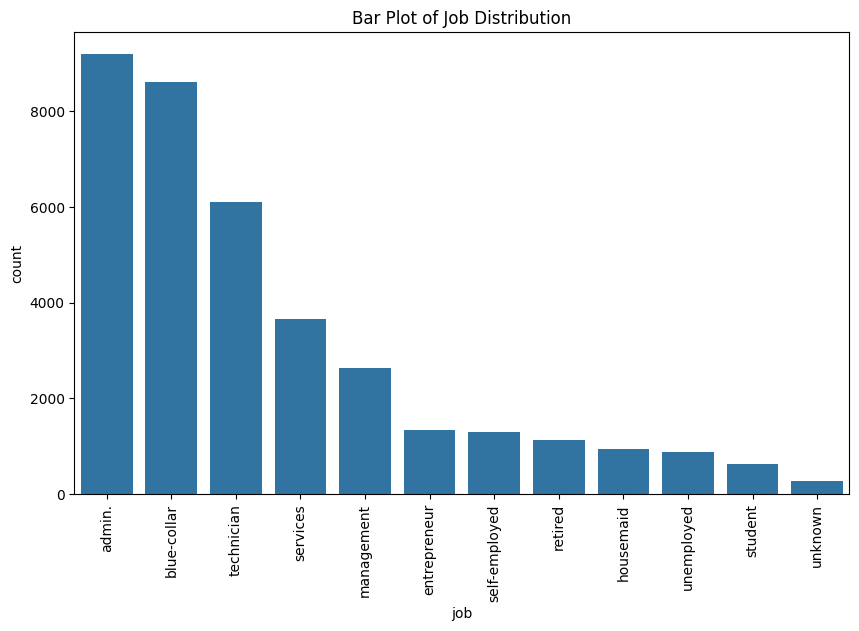

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='job', data=df, order=df['job'].value_counts().index)
plt.title('Bar Plot of Job Distribution')
plt.xticks(rotation=90)
plt.show()

3.5 Pie Plot

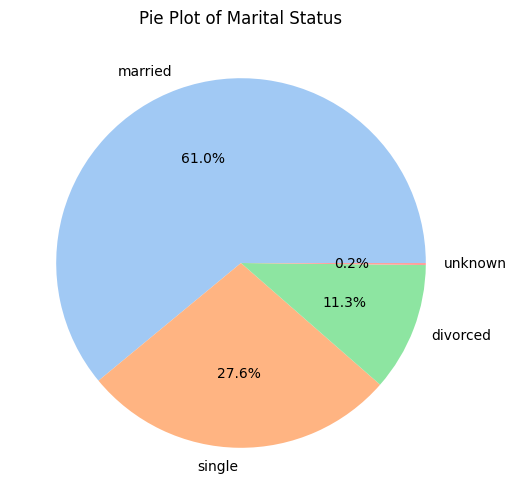

In [ ]:
df['marital'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6,6), colors=sns.color_palette('pastel'))
plt.title('Pie Plot of Marital Status')
plt.ylabel('')
plt.show()


3.6 Dotplot

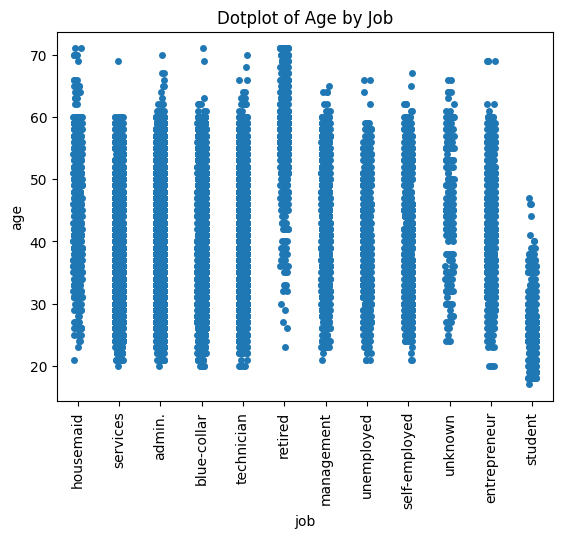

In [ ]:
sns.stripplot(x='job', y='age', data=df, jitter=True)
plt.title('Dotplot of Age by Job')
plt.xticks(rotation=90)
plt.show()

3.7 Boxplot

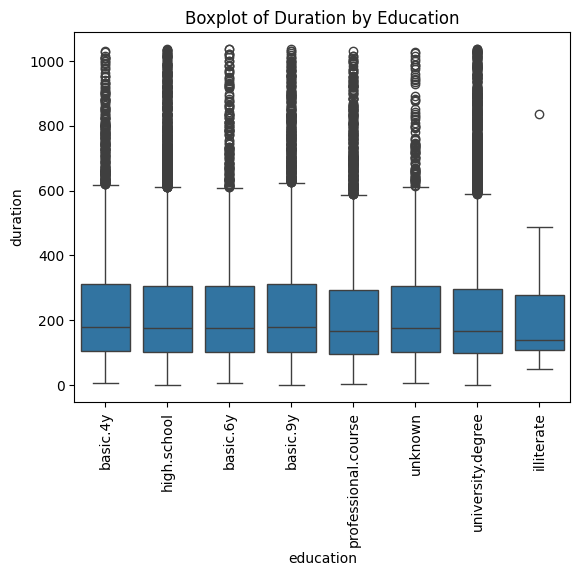

In [ ]:
sns.boxplot(x='education', y='duration', data=df)
plt.title('Boxplot of Duration by Education')
plt.xticks(rotation=90)
plt.show()

Step 4: Bivariate Analysis

4.1 Contingency Table

In [ ]:
cont_table = pd.crosstab(df['marital'], df['housing'])
print(cont_table)

housing      no  unknown    yes
marital                        
divorced   1899      108   2124
married   10228      538  11609
single     4456      239   5423
unknown      33        1     31


 4.2 Categorical vs Categorical Analysis


4.2.1 Stacked Bar Chart

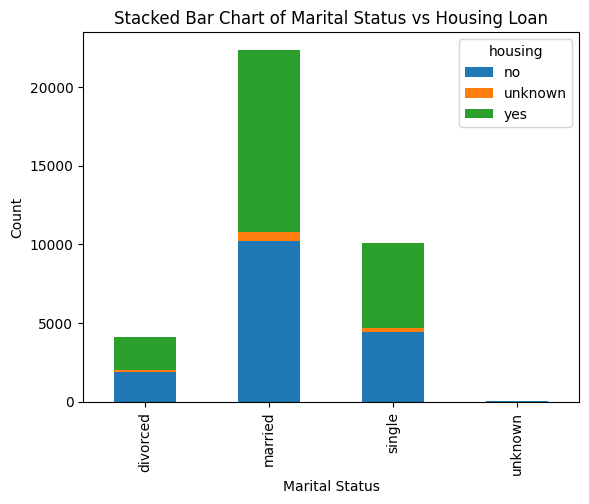

In [ ]:
cont_table.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Housing Loan')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

4.2.2 Stacked Bar Plot with Seaborn

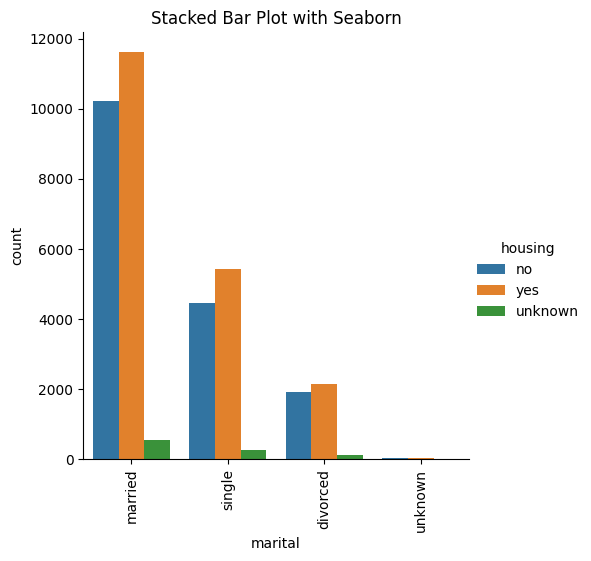

In [ ]:
sns.catplot(x='marital', hue='housing', kind='count', data=df)
plt.title('Stacked Bar Plot with Seaborn')
plt.xticks(rotation=90)
plt.show()

4.2.3 Grouped Bar Plot

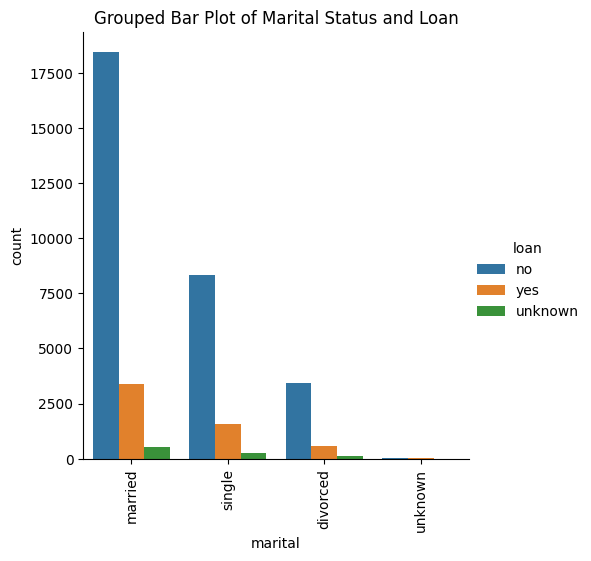

In [ ]:
sns.catplot(x='marital', hue='loan', kind='count', data=df)
plt.title('Grouped Bar Plot of Marital Status and Loan')
plt.xticks(rotation=90)
plt.show()

4.3 Categorical vs Quantitative Analysis


4.3.1 Bar Chart

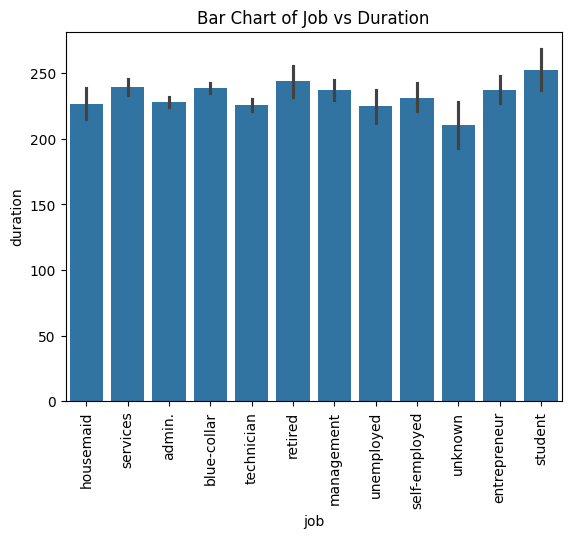

In [ ]:
sns.barplot(x='job', y='duration', data=df)
plt.title('Bar Chart of Job vs Duration')
plt.xticks(rotation=90)
plt.show()

4.3.2 Density Plot

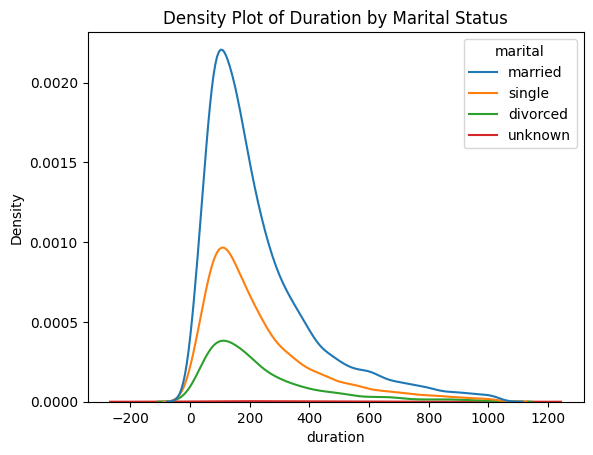

In [ ]:
sns.kdeplot(x='duration', hue='marital', data=df)
plt.title('Density Plot of Duration by Marital Status')
plt.show()


4.3.3 Box Plot

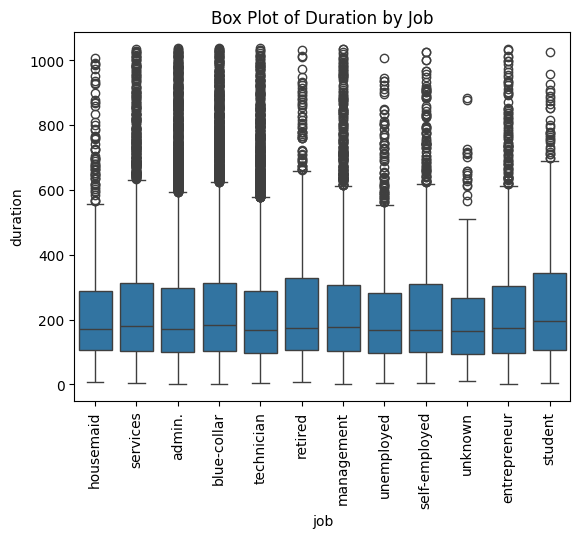

In [ ]:
sns.boxplot(x='job', y='duration', data=df)
plt.title('Box Plot of Duration by Job')
plt.xticks(rotation=90)
plt.show()

4.3.4 Violin Plot

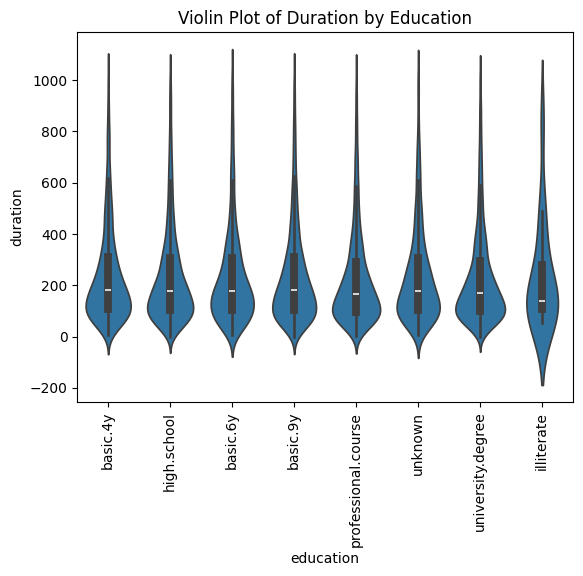

In [ ]:
sns.violinplot(x='education', y='duration', data=df)
plt.title('Violin Plot of Duration by Education')
plt.xticks(rotation=90)
plt.show()


4.3.5 Combined Violin and Box Plots

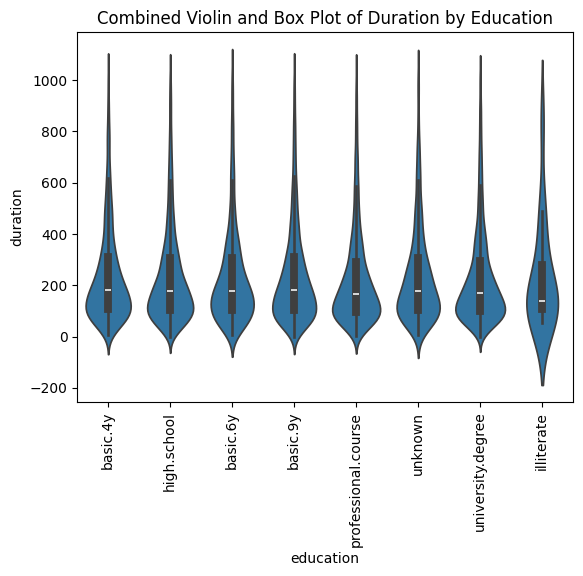

In [ ]:
sns.violinplot(x='education', y='duration', data=df, inner='box')
plt.title('Combined Violin and Box Plot of Duration by Education')
plt.xticks(rotation=90)
plt.show()


4.4 Quantitative vs Quantitative Analysis

 4.4.1 Line Plot

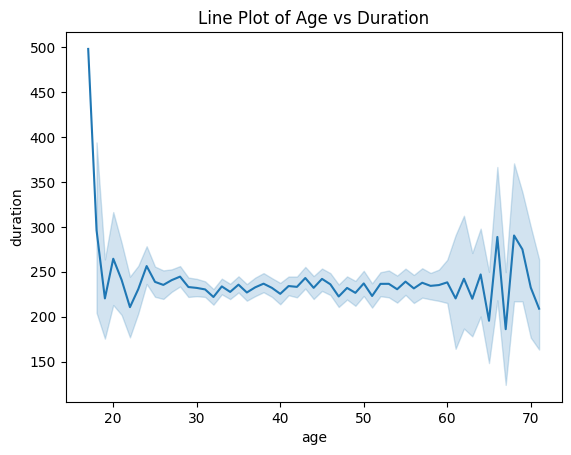

In [ ]:
sns.lineplot(x='age', y='duration', data=df)
plt.title('Line Plot of Age vs Duration')
plt.show()

4.4.2 Correlation Heatmap

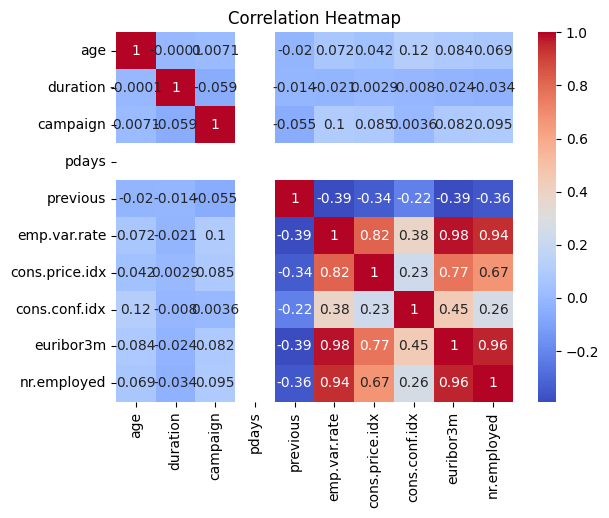

In [ ]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

4.4.3 Scatter Plot

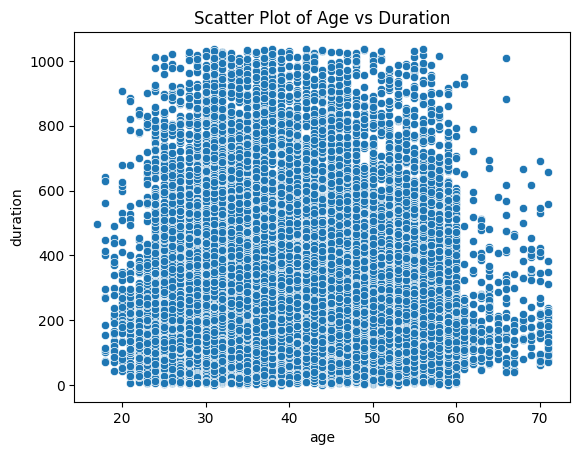

In [ ]:
sns.scatterplot(x='age', y='duration', data=df)
plt.title('Scatter Plot of Age vs Duration')
plt.show()

Step 5: Multivariate Analysis

5.1 Scatter Plot with Color as a Third Variable

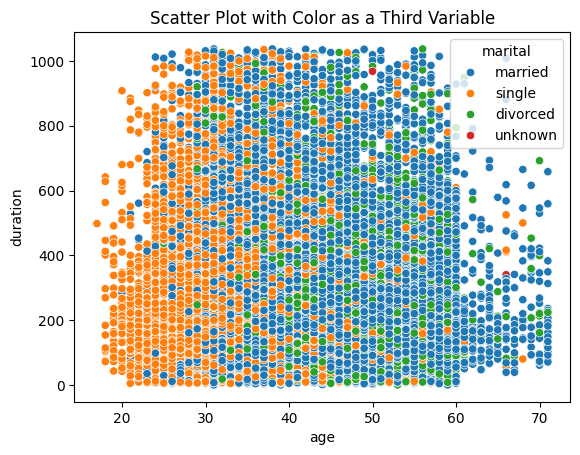

In [ ]:
sns.scatterplot(x='age', y='duration', hue='marital', data=df)
plt.title('Scatter Plot with Color as a Third Variable')
plt.show()

5.2 Scatter Plot with Color and Shape as Variables

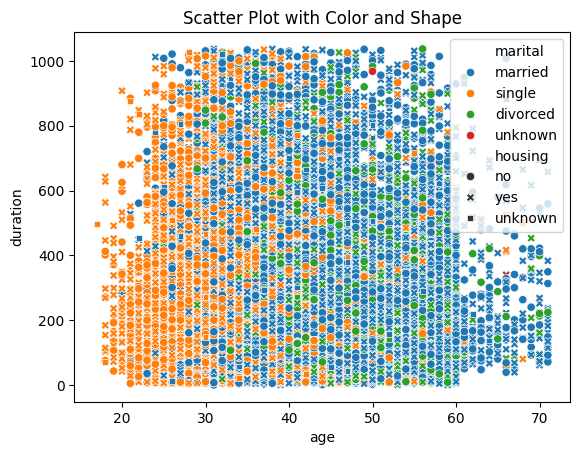

In [ ]:
sns.scatterplot(x='age', y='duration', hue='marital', style='housing', data=df)
plt.title('Scatter Plot with Color and Shape')
plt.show()

 5.3 Scatter Plot with Color and Size as Variables


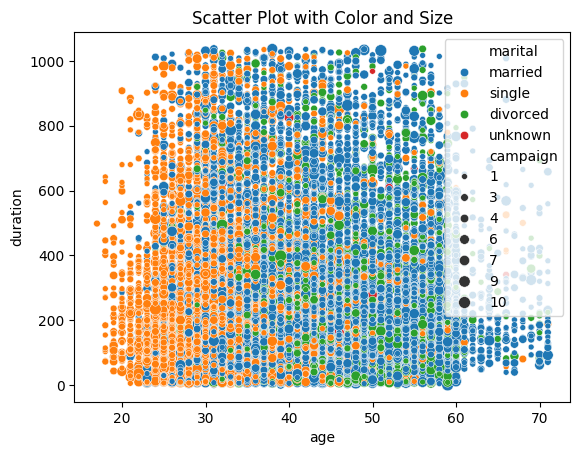

In [ ]:
sns.scatterplot(x='age', y='duration', hue='marital', size='campaign', data=df)
plt.title('Scatter Plot with Color and Size')
plt.show()

 5.4 Bubble Plot


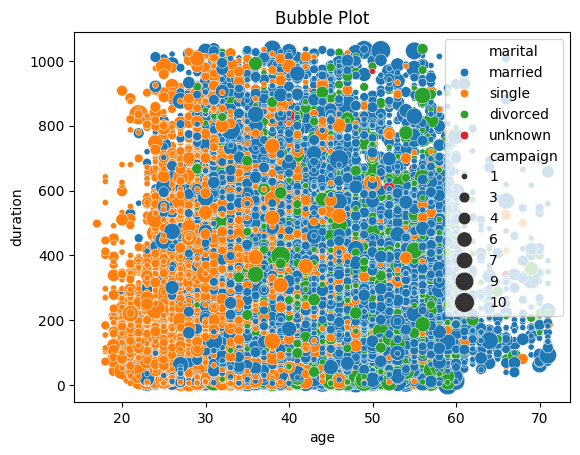

In [ ]:
sns.scatterplot(x='age', y='duration', size='campaign', hue='marital', data=df, sizes=(20, 200))
plt.title('Bubble Plot')
plt.show()

 5.5 Faceted Histogram

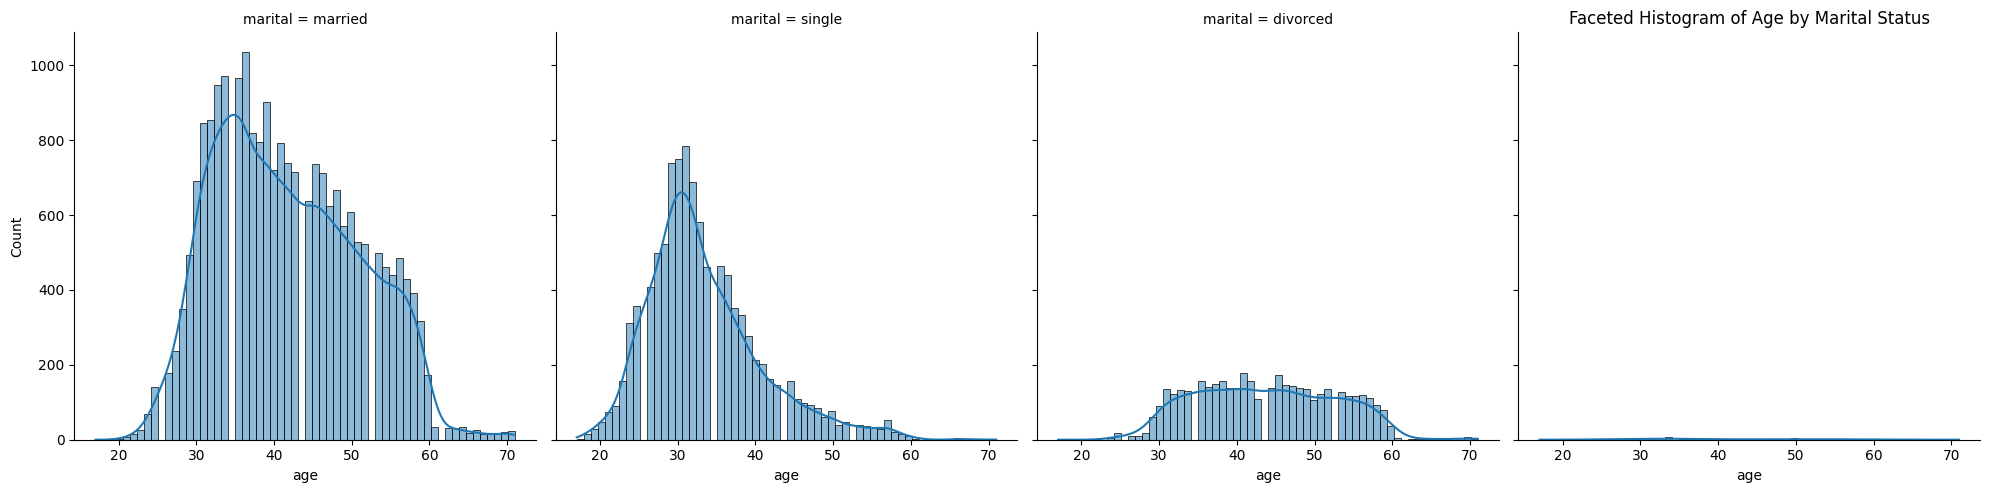

In [ ]:
sns.displot(df, x='age', col='marital', kde=True)
plt.title('Faceted Histogram of Age by Marital Status')
plt.show()

 5.6 Pairplot

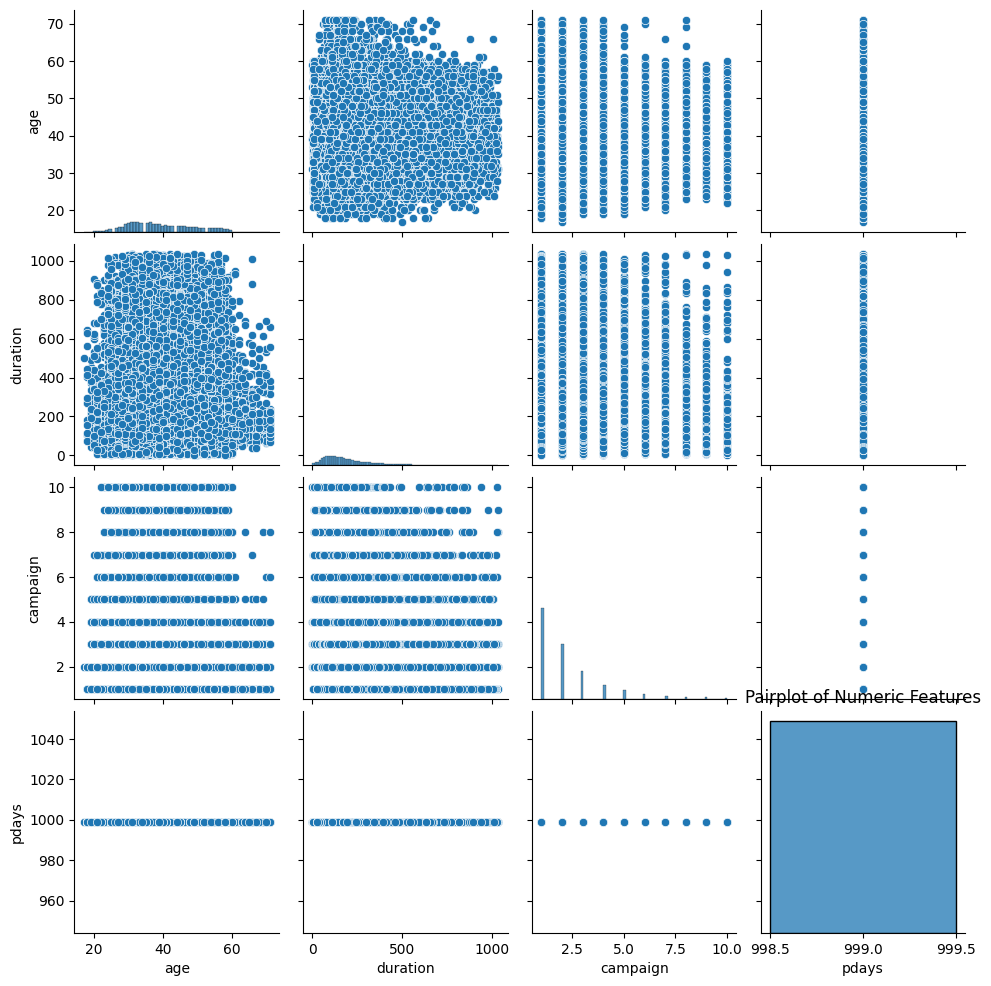

In [ ]:
sns.pairplot(df[['age', 'duration', 'campaign', 'pdays']])
plt.title('Pairplot of Numeric Features')
plt.show()

Module 2

6.1 Merging Data

Simulating a merge with a sample dataframe

6.2 Reshaping with Hierarchical Indexing

In [ ]:
reshaped = df.pivot_table(values='duration', index='age', columns='marital', aggfunc='mean')
print(reshaped.head())

marital  divorced  married      single  unknown
age                                            
17            NaN      NaN  420.000000      NaN
18            NaN      NaN  321.785714      NaN
19            NaN      NaN  271.500000      NaN
20            NaN   285.00  288.546875      NaN
21            NaN   456.25  247.904255      NaN


6.3 Transformation Techniques

In [ ]:

df['log_duration'] = np.log1p(df['duration'])

6.4 Discretization and Binning

In [ ]:
df['age_bins'] = pd.cut(df['age'], bins=5, labels=['Young', 'Young Adult', 'Middle-Aged', 'Senior', 'Elderly'])


Module 3: Time-Series Analysis

 7.1 Simulate Time Index

In [ ]:
df['time_index'] = pd.date_range(start='2023-01-01', periods=len(df), freq='D')


 7.2 Check Missing Values

In [ ]:
print(df.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
log_duration      0
age_bins          0
time_index        0
dtype: int64


 7.3 Plot Time Series

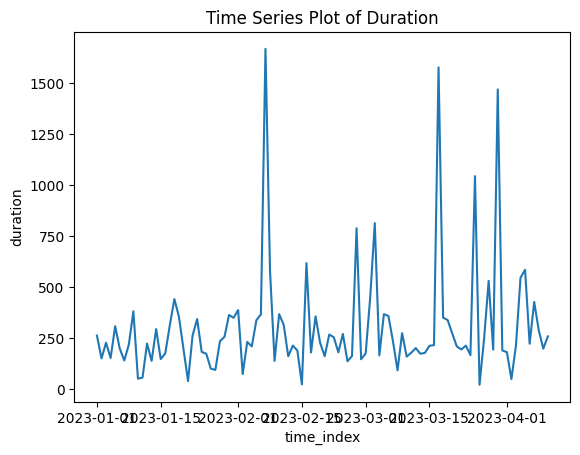

In [ ]:
sns.lineplot(x='time_index', y='duration', data=df.head(100))
plt.title('Time Series Plot of Duration')
plt.show()

7.4 Decompose Dataset

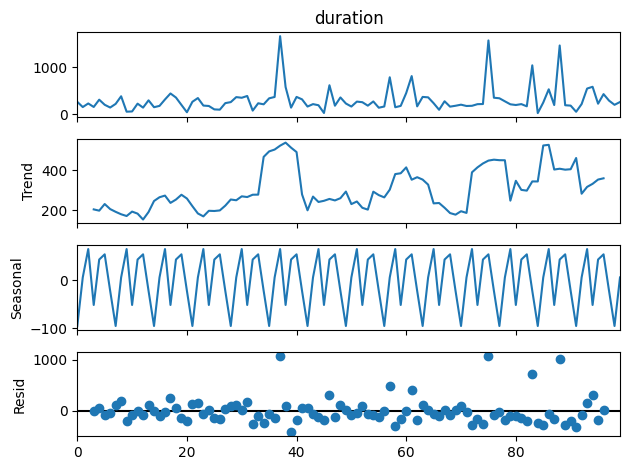

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['duration'].head(100), model='additive', period=7)
result.plot()
plt.show()

 7.5 Make Dataset Stationary

In [ ]:
df['duration_diff'] = df['duration'] - df['duration'].shift(1)

7.6 Plot Box Plot Across Categories

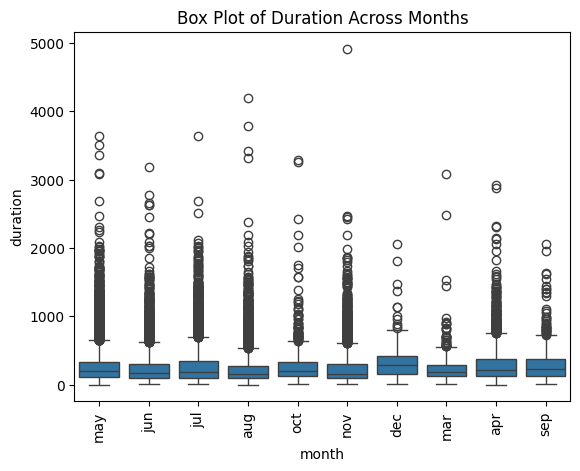

In [ ]:
sns.boxplot(x='month', y='duration', data=df)
plt.title('Box Plot of Duration Across Months')
plt.xticks(rotation=90)
plt.show()